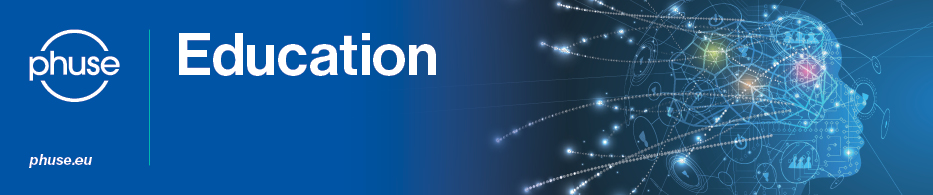

# Trial Arms - TA

The Trial Arms domain provides information on each planned arm in a trial. It describes the sequences of Elements in each Epoch for each Arm, and thus describes the complete sequence of Elements in each Arm. For starters, we take the easiest example from the CDISC Implementation Guide. This is a parallel design including a screening period, a run-in phase. It is Placebo controlled study with two drug treatments A and B.

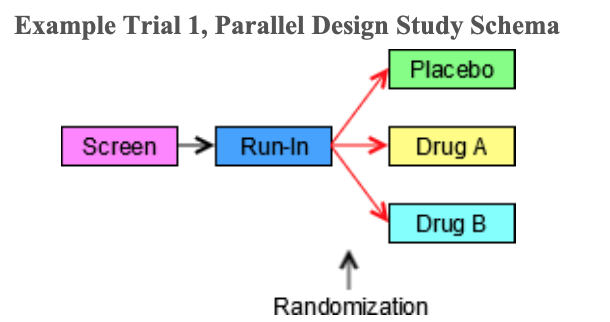

## Initialize

We will do quite some data transformations and generations. We will also produce random numbers and do some maths following distributions, etc. In order to do this in Python, we will import the usual suspects `Pandas` and `NumPy` using the industry standard abbreviations `pd` and `np`.

In [3]:
import pandas as pd
import numpy as np

Let's now setup the dataframe following the explanations from the CDISC SDTM V3.3 IG.
At first we start with the treatments and setup a datasets with the arms and the respective arm codes and decodes.

In [4]:
treatments = pd.DataFrame({"DOMAIN":["TA","TA","TA"],
                           "ARM":["Placebo","Drug A","Drug B"],
                           "ARMCD":["PLC","A","B"]})
treatments

,DOMAIN,ARM,ARMCD
0,TA,Placebo,PLC
1,TA,Drug A,A
2,TA,Drug B,B


In a second step we now produce the various trial elements again with the respective codes and decodes. Notice that the `ELEMENT`and the `ETCD`both have an empty record for the treatment. This will later be replaced by the "Randomized to Placebo/A/B", but this depends in the treatment of course.

In [5]:
elements = pd.DataFrame({"DOMAIN":["TA","TA","TA"],
                         "EPOCH":["SCREENING","RUN-IN","TREATMENT"],
                         "TAETORD":[1,2,3],
                         "ETCD":["SCRN","RI",""],
                         "ELEMENT":["Screen","Run-in",""]})
elements

,DOMAIN,EPOCH,TAETORD,ETCD,ELEMENT
0,TA,SCREENING,1,SCRN,Screen
1,TA,RUN-IN,2,RI,Run-in
2,TA,TREATMENT,3,,


Now we create the dataset `TA` by merging the treatments and elements together using our help key variable `key`.

In [6]:
ta = pd.merge(treatments,elements,on='DOMAIN')
ta

,DOMAIN,ARM,ARMCD,EPOCH,TAETORD,ETCD,ELEMENT
0,TA,Placebo,PLC,SCREENING,1,SCRN,Screen
1,TA,Placebo,PLC,RUN-IN,2,RI,Run-in
2,TA,Placebo,PLC,TREATMENT,3,,
3,TA,Drug A,A,SCREENING,1,SCRN,Screen
4,TA,Drug A,A,RUN-IN,2,RI,Run-in
5,TA,Drug A,A,TREATMENT,3,,
6,TA,Drug B,B,SCREENING,1,SCRN,Screen
7,TA,Drug B,B,RUN-IN,2,RI,Run-in
8,TA,Drug B,B,TREATMENT,3,,


Now we need to set the variable `TABRANCH`. This should be "Randomized to Placebo/A/B" in the Run-in epoch depending on the actual arm. 

In [7]:
ta['TABRANCH'] = np.where((ta.ETCD == "RI"),'Randomized to ' + ta.ARM," ")
ta

,DOMAIN,ARM,ARMCD,EPOCH,TAETORD,ETCD,ELEMENT,TABRANCH
0,TA,Placebo,PLC,SCREENING,1,SCRN,Screen,
1,TA,Placebo,PLC,RUN-IN,2,RI,Run-in,Randomized to Placebo
2,TA,Placebo,PLC,TREATMENT,3,,,
3,TA,Drug A,A,SCREENING,1,SCRN,Screen,
4,TA,Drug A,A,RUN-IN,2,RI,Run-in,Randomized to Drug A
5,TA,Drug A,A,TREATMENT,3,,,
6,TA,Drug B,B,SCREENING,1,SCRN,Screen,
7,TA,Drug B,B,RUN-IN,2,RI,Run-in,Randomized to Drug B
8,TA,Drug B,B,TREATMENT,3,,,


Notice that the `ETCD` variable is still empty for the treatment phase? In these cases the `ETCD` variable should get the value of the variable `ARMCD`, 

In [8]:
ta['ETCD'] = np.where((ta.ETCD == ""), ta.ARMCD,ta.ETCD)
ta

,DOMAIN,ARM,ARMCD,EPOCH,TAETORD,ETCD,ELEMENT,TABRANCH
0,TA,Placebo,PLC,SCREENING,1,SCRN,Screen,
1,TA,Placebo,PLC,RUN-IN,2,RI,Run-in,Randomized to Placebo
2,TA,Placebo,PLC,TREATMENT,3,PLC,,
3,TA,Drug A,A,SCREENING,1,SCRN,Screen,
4,TA,Drug A,A,RUN-IN,2,RI,Run-in,Randomized to Drug A
5,TA,Drug A,A,TREATMENT,3,A,,
6,TA,Drug B,B,SCREENING,1,SCRN,Screen,
7,TA,Drug B,B,RUN-IN,2,RI,Run-in,Randomized to Drug B
8,TA,Drug B,B,TREATMENT,3,B,,


Almost last but not least, we also need to set the variable `ELEMENT` for these cases, where it does not have values.

In [9]:
ta['ELEMENT'] = np.where((ta.ELEMENT == ""),ta.ARM,ta.ELEMENT)
ta

,DOMAIN,ARM,ARMCD,EPOCH,TAETORD,ETCD,ELEMENT,TABRANCH
0,TA,Placebo,PLC,SCREENING,1,SCRN,Screen,
1,TA,Placebo,PLC,RUN-IN,2,RI,Run-in,Randomized to Placebo
2,TA,Placebo,PLC,TREATMENT,3,PLC,Placebo,
3,TA,Drug A,A,SCREENING,1,SCRN,Screen,
4,TA,Drug A,A,RUN-IN,2,RI,Run-in,Randomized to Drug A
5,TA,Drug A,A,TREATMENT,3,A,Drug A,
6,TA,Drug B,B,SCREENING,1,SCRN,Screen,
7,TA,Drug B,B,RUN-IN,2,RI,Run-in,Randomized to Drug B
8,TA,Drug B,B,TREATMENT,3,B,Drug B,


As a very last step, we now set the variable `STUDYID` and also the `TATRANS` to empty and we are done, except for the order of the variables.

In [10]:
ta['STUDYID'] = 'EX1'
ta['TATRANS'] = ""
ta

,DOMAIN,ARM,ARMCD,EPOCH,TAETORD,ETCD,ELEMENT,TABRANCH,STUDYID,TATRANS
0,TA,Placebo,PLC,SCREENING,1,SCRN,Screen,,EX1,
1,TA,Placebo,PLC,RUN-IN,2,RI,Run-in,Randomized to Placebo,EX1,
2,TA,Placebo,PLC,TREATMENT,3,PLC,Placebo,,EX1,
3,TA,Drug A,A,SCREENING,1,SCRN,Screen,,EX1,
4,TA,Drug A,A,RUN-IN,2,RI,Run-in,Randomized to Drug A,EX1,
5,TA,Drug A,A,TREATMENT,3,A,Drug A,,EX1,
6,TA,Drug B,B,SCREENING,1,SCRN,Screen,,EX1,
7,TA,Drug B,B,RUN-IN,2,RI,Run-in,Randomized to Drug B,EX1,
8,TA,Drug B,B,TREATMENT,3,B,Drug B,,EX1,


The only remaining thing we need to do now is to re-arrange the variables in the correct order and we are done.

In [11]:
ta=ta[['STUDYID', 'DOMAIN', 'ARMCD','ARM','TAETORD','ETCD','ELEMENT','TABRANCH','TATRANS','EPOCH']]
ta

,STUDYID,DOMAIN,ARMCD,ARM,TAETORD,ETCD,ELEMENT,TABRANCH,TATRANS,EPOCH
0,EX1,TA,PLC,Placebo,1,SCRN,Screen,,,SCREENING
1,EX1,TA,PLC,Placebo,2,RI,Run-in,Randomized to Placebo,,RUN-IN
2,EX1,TA,PLC,Placebo,3,PLC,Placebo,,,TREATMENT
3,EX1,TA,A,Drug A,1,SCRN,Screen,,,SCREENING
4,EX1,TA,A,Drug A,2,RI,Run-in,Randomized to Drug A,,RUN-IN
5,EX1,TA,A,Drug A,3,A,Drug A,,,TREATMENT
6,EX1,TA,B,Drug B,1,SCRN,Screen,,,SCREENING
7,EX1,TA,B,Drug B,2,RI,Run-in,Randomized to Drug B,,RUN-IN
8,EX1,TA,B,Drug B,3,B,Drug B,,,TREATMENT


Pickle dataset and store it permanently

In [12]:
ta.to_pickle('data/ta.pkl')

## Exercise

Take the CDISC SDMT V3.3 Implementation guide and create the TA domain for the example study 2. This is an example for a crossover trial. The figure below shows the Schema for this example trial.

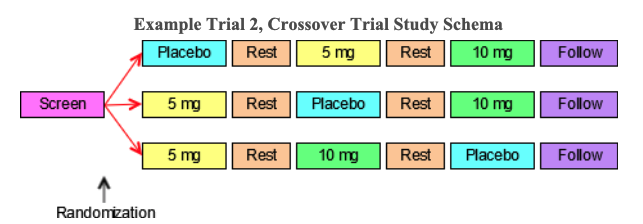

The resulting TA dataset should look like the dataset below. Only the first arm is displayed here. You can find the full dataset in the SDTM IG V3.3.

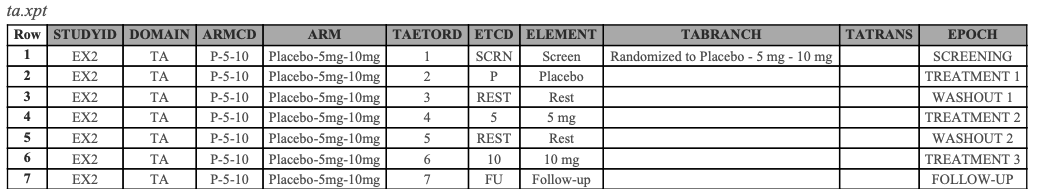

<img src="author-sascha-ahrweiler-small.png">
<img src="Logo%20standard.png" alt="PHUSE Education" style="width: 400px;"/>